<a href="https://colab.research.google.com/github/jarodsagendorph/SIR-and-SIS-Epidemic-Modeling/blob/master/SIR%20and%20SIS%20Epidemic%20Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Modelings of the SIR and SIS Epidemic Models

## Jarod Sagendorph

## A Basic Model
The most basic model of these curves incorporates the differential equations (6) and (7) found in "Epidemic processes in complex networks" (Pastor-Satorras et al., 2015), while defining beta and mu as constants. (For the example, we set mu to 0.1 and beta to 0.75. This is somewhat arbitrary and will be discussed in greater depth later on.) The results can be seen below.


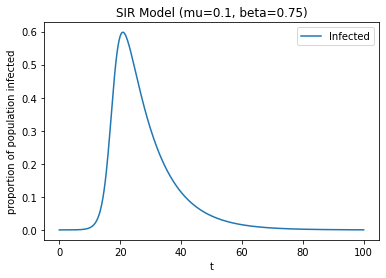

In [0]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Predefined Constants
mu = .1
beta = .75
n = 1000 # number of time steps
max_t = 100 # upper bound number of days

# Define differential equations
def sir(y, t):
    S = y[0]
    I = y[1]
    R = y[2]
    # Model equations
    dsdt = -beta * I * S
    didt = beta * I * S - mu * I
    drdt = mu * I
    return [dsdt, didt, drdt]

# Initial conditions
S0 = 0.99999
I0 = 0.00001
R0 = 0.0
y0 = [S0, I0, R0]
t = np.linspace(0, max_t, n)

# Solve Equations
sol = odeint(sir, y0, t)
S = sol[:, 0]
I = sol[:, 1]
R = sol[:, 2]


# Plot results
plt.plot(t, I, label='Infected')
plt.title('SIR Model (mu=0.1, beta=0.75)')
plt.xlabel('t')
plt.ylabel('proportion of population infected')
plt.legend()
plt.show()


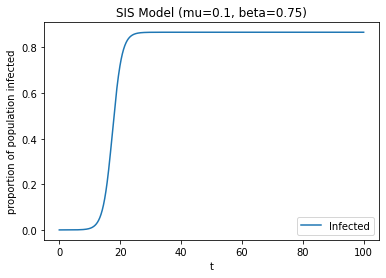

In [0]:
def sis(y, t):
    S = y[0]
    I = y[1]
    # Model equations
    dsdt = -beta * I * S + mu * I
    didt = beta * I * S - mu * I
    return [dsdt, didt]

# Initial conditions
S0 = 0.99999
I0 = 0.00001
y0 = [S0, I0]
t = np.linspace(0, max_t, n)

# Solve Equations
sol = odeint(sis, y0, t)
S = sol[:, 0]
I = sol[:, 1]


# Plot results
plt.plot(t, I, label='Infected')
plt.title('SIS Model (mu=0.1, beta=0.75)')
plt.xlabel('t')
plt.ylabel('proportion of population infected')
plt.legend()
plt.show()

## An Improved Model
In an attempt to make this model more life-like, we can introduce some variation in the statistical parameters, mu and beta. Pastor-Sattoras, et al. cites D. R. Cox's *Renewal Theory* (1967) in assuming that mu is a Poisson process. This adds more noise to the models, as seen below:



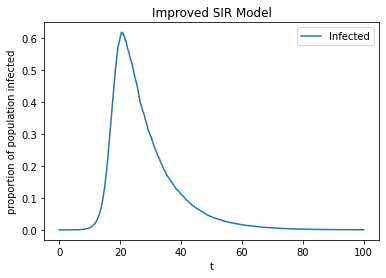

In [0]:
def sir_poisson(y, t, mu_p, b):
  S = y[0]
  I = y[1]
  R = y[2]
  # Model equations
  dsdt = -b * I * S
  didt = b * I * S - mu_p * I
  drdt = mu_p * I
  return [dsdt, didt, drdt]

# Initial conditions
S0 = 0.99999
I0 = 0.00001
R0 = 0.0
y0 = [S0, I0, R0]
t = np.linspace(0, max_t, n)
I = np.empty_like(t)

# Solve Equations
I[0] = I0
for i in range(1, n):
  tspan = [t[i-1], t[i]]
  sol = odeint(sir_poisson, y0, tspan, args=(float(np.random.poisson(mu*100)/100), beta))
  y0 = sol[1]
  I[i]=y0[1]


# Plot results
plt.plot(t, I, label='Infected')
plt.title('Improved SIR Model')
plt.xlabel('t')
plt.ylabel('proportion of population infected')
plt.legend()
plt.show()


Now that we have a slightly noisy function, we can change the inital values to try to see how the parameters effect the data. We'll define the following function for ease:

In [0]:
def plot_SIR(m, b, initial_infected):
  S0 = 1-initial_infected
  I0 = initial_infected
  R0 = 0.0
  y0 = [S0, I0, R0]
  t = np.linspace(0, max_t, n)
  I = np.empty_like(t)

  # Solve Equations
  I[0] = I0
  for i in range(1, n):
    tspan = [t[i-1], t[i]]
    sol = odeint(sir_poisson, y0, tspan, args=(float(np.random.poisson(m*100)/100), b))
    y0 = sol[1]
    I[i]=y0[1]


  # Plot results
  plt.plot(t, I, label='Infected')
  plt.title('Improved SIR Model')
  plt.xlabel('t')
  plt.ylabel('proportion of population infected')
  plt.legend()
  plt.show()


## How changes in mu effect the data:
low mu (mu = 0.005)

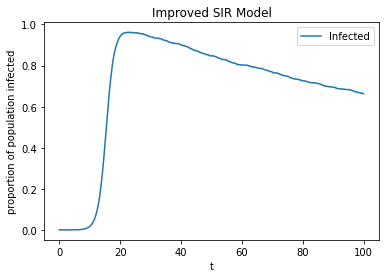

In [0]:
plot_SIR(0.005, 0.75, 0.00001)

medium mu (0.1)

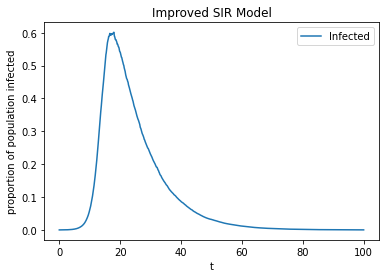

In [0]:
plot_SIR(0.1, 0.75, 0.0001)

hi mu (0.6)

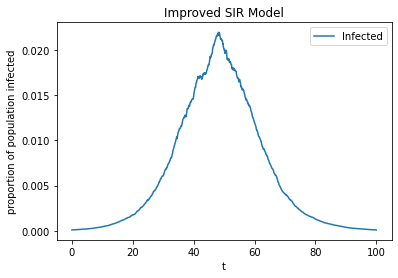

In [0]:
plot_SIR(0.6, 0.75, 0.0001)

We can see, then, that by increasing mu (ie, shortening the infection time) a substantially less amount of people are infected by the disease (from over 80% of the population being infected when mu=0.005 to around 2% when mu=0.6).

# Changes in beta:

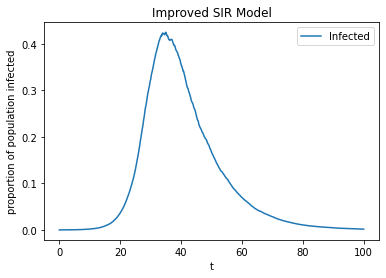

In [0]:
plot_SIR(0.1, 0.4, 0.0001)

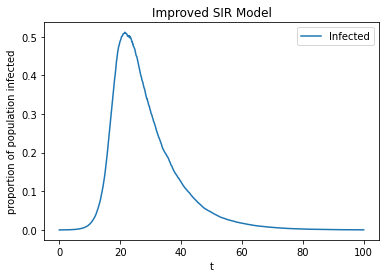

In [0]:
plot_SIR(0.1, 0.6, 0.0001)

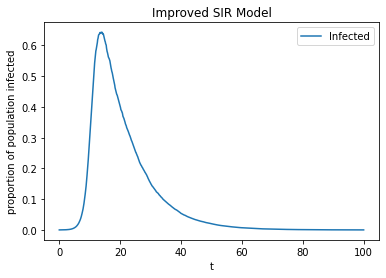

In [0]:
plot_SIR(0.1, 0.95, 0.0001)

Higher beta values (meaning a higher probability of infection when interacting with sick people) causes the curve to reach greater heights, but also spans a smaller time frame. We've probably all become familiar with this in looking at graphs for "flattening the curve" since the outbreak, with no interruption, would happen quicker than if controlled through measures like social distancing, but would be much more devastating to the population at large.